# Comprehensive Project Challenge

## Summer Olympic Games, Medal Tables 1896-2012

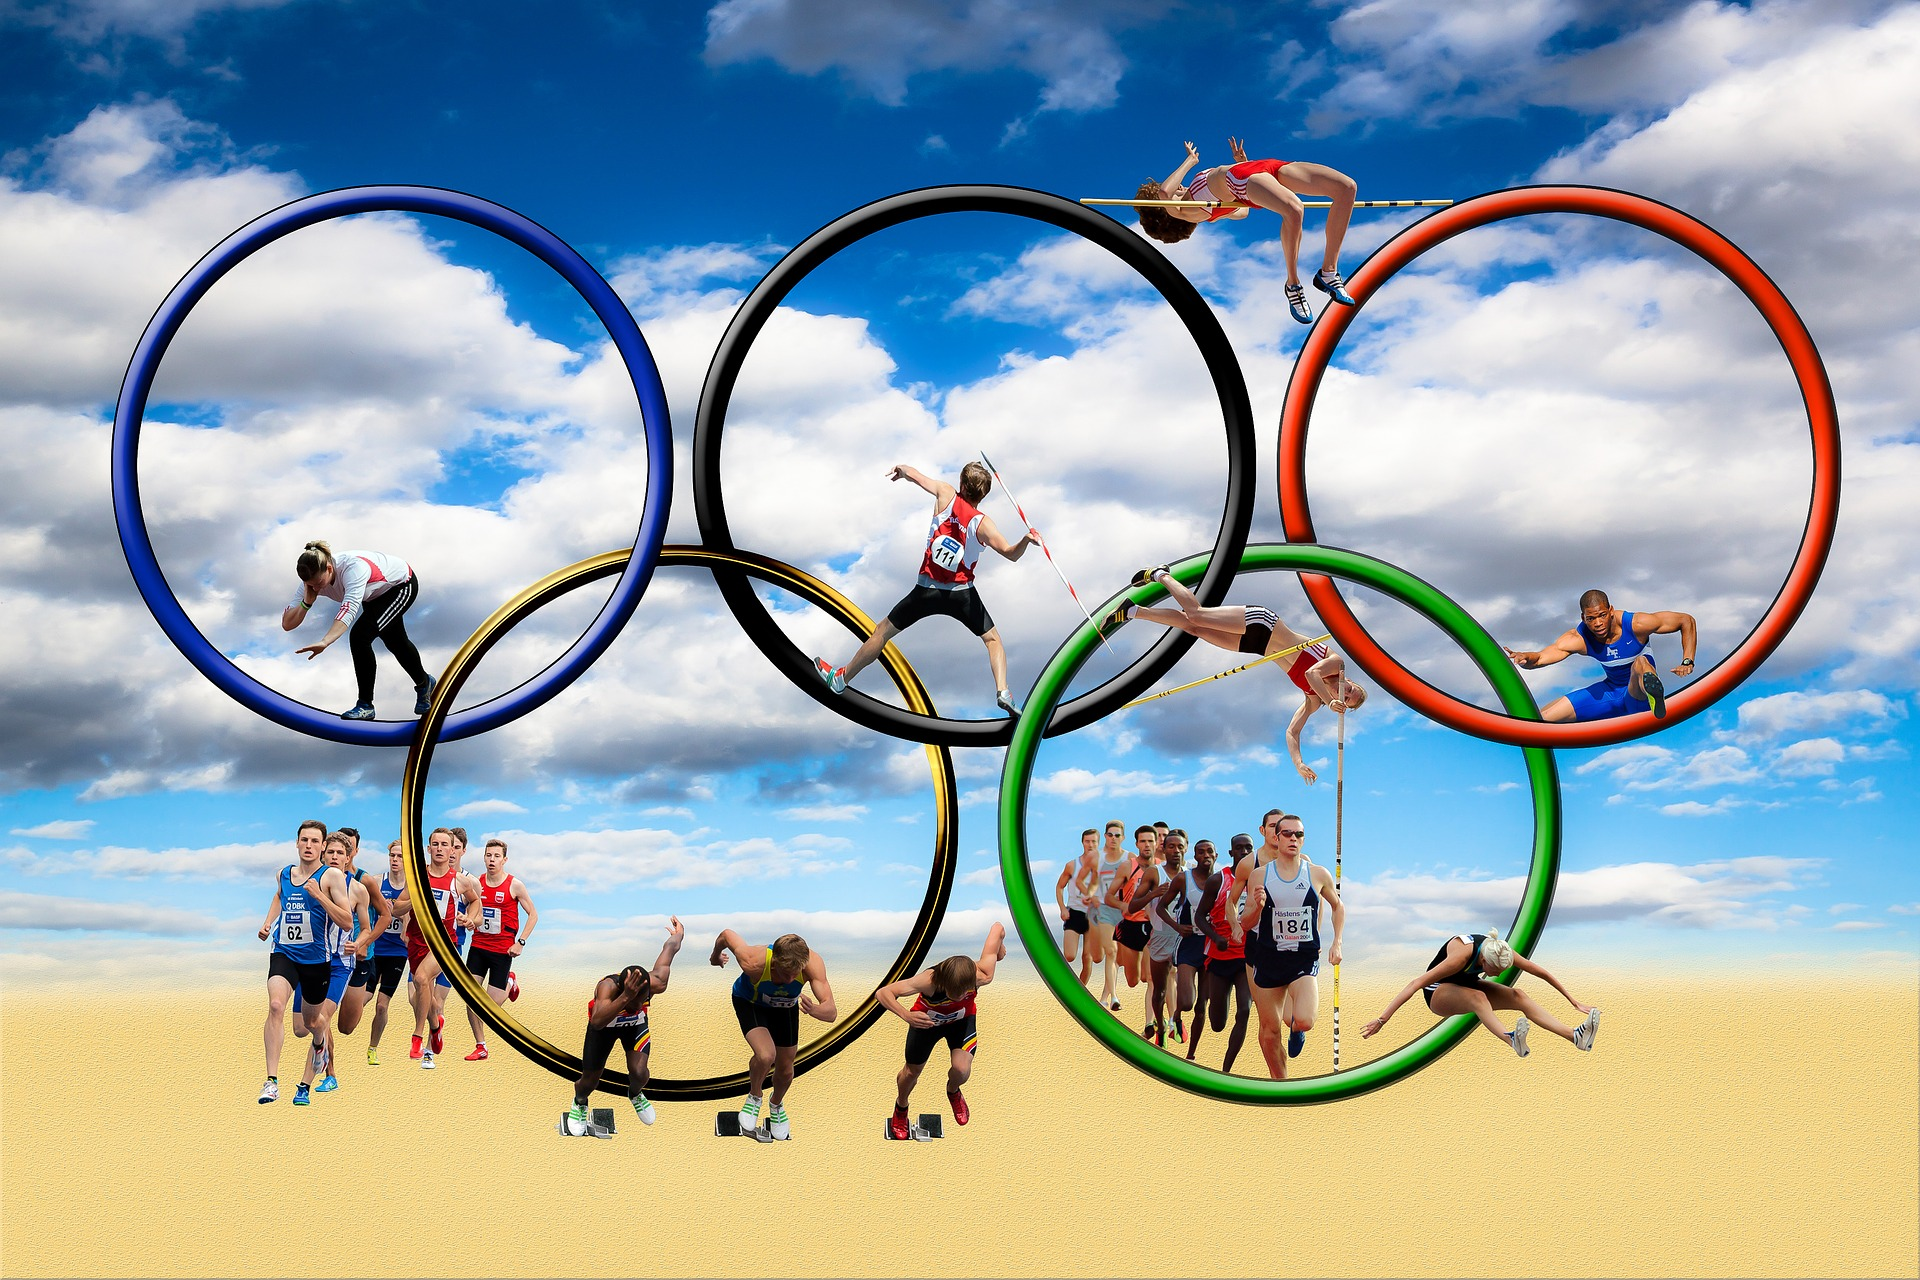

### Welcome to the final coding challenge!

This challenge requires you to __apply__ and __combine__ many concepts and methods that you have learned in this course.

It is frequently used in job application processes / assessment centers in Data Science to check the candidates´ abilities to work with, manipulate and aggregate data. Also experienced Data Scientists have difficulties to solve the problem. And the reason for this is not that the challenge is coding-wise extremely complex. But it requires a combination of <br>
- __solid coding skills__, <br><br>
and, even more important <br><br>
   
- the ability to __interpret__ and __understand__ the __underlying data__ and to __incorporate inputs__ from subject matter __experts__ (in this case Sports experts) <br> <br>
__"Thinking in Data Structures!"__ -> requires some practise but also some talent. 

### The Case

It´s your first day in a Data Science advisory firm and your boss asks you to produce the __official Summer Olympic Games Medal Tables for all Editions from 1896 to 2012__. <br><br>
All you can use is a dataset with raw data containing over 31,000 medals (__summer.csv__) and the official Medal Tables for the Editions 1996 and 1976 from Wikipedia. (__wik_1996.csv__, __wik_1976.csv__). Use the two official Medal Tables as a __reference__ to check whether your code produces the correct output! <br><br>
Your goal is to __minimize the divergence__ between your aggregated Medal Tables and the official Medal Tables. Let´s assume that the official number of Gold Medals for the United States in the Edition 1996 is 44 and your code produces 46. This is an absolute divergence of 2. <br> <br>
__Calculate the total absolute divergence for the Editions 1996 and 1976 (the "Score")!__ The __optimal Score is 0__! 

### Naive approach

In [1]:
import pandas as pd

In [2]:
summer = pd.read_csv("summer.csv")

In [3]:
summer76 = summer.loc[summer.Year == 1976]

In [4]:
summer76.head()

Year      City     Sport Discipline                 Athlete Country  \
13900  1976  Montreal  Aquatics     Diving       ALEINIK, Vladimir     URS   
13901  1976  Montreal  Aquatics     Diving          DIBIASI, Klaus     ITA   
13902  1976  Montreal  Aquatics     Diving       LOUGANIS, Gregory     USA   
13903  1976  Montreal  Aquatics     Diving  WILSON, Deborah Keplar     USA   
13904  1976  Montreal  Aquatics     Diving  VAYTSEKHOVSKAYA, Elena     URS   

      Gender         Event   Medal  
13900    Men  10M Platform  Bronze  
13901    Men  10M Platform    Gold  
13902    Men  10M Platform  Silver  
13903  Women  10M Platform  Bronze  
13904  Women  10M Platform    Gold

In [5]:
mt76 = summer76.groupby(["Country", "Medal"]).Medal.count().unstack(fill_value = 0)
mt76.head()

Medal    Bronze  Gold  Silver
Country                      
AUS           8     0      16
AUT           1     0       0
BEL           6     0       3
BER           1     0       0
BRA           3     0       0

In [6]:
mt76 = mt76.sort_values(["Gold", "Silver", "Bronze"], ascending = False)[["Gold", "Silver", "Bronze"]]
mt76.head(10)

Medal    Gold  Silver  Bronze
Country                      
URS       113      93      79
GDR        99      51      42
USA        63      56      36
JPN        25       6      10
FRG        21      24      30
POL        18      29      26
NZL        17       1       9
HUN        14       6      35
SWE         9       1       0
BUL         8      13      18

In [7]:
pd.read_csv("wik_1976.csv")

Rank                        NOC  Gold  Silver  Bronze  Total
0                  1         Soviet Union (URS)    49      41      35    125
1                  2         East Germany (GDR)    40      25      25     90
2                  3        United States (USA)    34      35      25     94
3                  4         West Germany (FRG)    10      12      17     39
4                  5                Japan (JPN)     9       6      10     25
5                  6               Poland (POL)     7       6      13     26
6                  7             Bulgaria (BUL)     6       9       7     22
7                  8                 Cuba (CUB)     6       4       3     13
8                  9              Romania (ROU)     4       9      14     27
9                 10              Hungary (HUN)     4       5      13     22
10                11              Finland (FIN)     4       2       0      6
11                12               Sweden (SWE)     4       1       0      5
12                13        Great Britain (GBR)     3       5       5     13
13                14                Italy (ITA)     2       7       4     13
14                15               France (FRA)     2       3       4      9
15                16           Yugoslavia (YUG)     2       3       3      8
16                17       Czechoslovakia (TCH)     2       2       4      8
17                18          New Zealand (NZL)     2       1       1      4
18                19          South Korea (KOR)     1       1       4      6
19                20          Switzerland (SUI)     1       1       2      4
20                21              Jamaica (JAM)     1       1       0      2
21                21          North Korea (PRK)     1       1       0      2
22                21               Norway (NOR)     1       1       0      2
23                24              Denmark (DEN)     1       0       2      3
24                25               Mexico (MEX)     1       0       1      2
25                26  Trinidad and Tobago (TRI)     1       0       0      1
26                27              Canada (CAN)*     0       5       6     11
27                28              Belgium (BEL)     0       3       3      6
28                29          Netherlands (NED)     0       2       3      5
29                30             Portugal (POR)     0       2       0      2
30                30                Spain (ESP)     0       2       0      2
31                32            Australia (AUS)     0       1       4      5
32                33                 Iran (IRI)     0       1       1      2
33                34             Mongolia (MGL)     0       1       0      1
34                34            Venezuela (VEN)     0       1       0      1
35                36               Brazil (BRA)     0       0       2      2
36                37              Austria (AUT)     0       0       1      1
37                37              Bermuda (BER)     0       0       1      1
38                37             Pakistan (PAK)     0       0       1      1
39                37          Puerto Rico (PUR)     0       0       1      1
40                37             Thailand (THA)     0       0       1      1
41  Totals (41 NOCs)           Totals (41 NOCs)   198     199     216    613

-> __Far away from the target!!!__

#### Fortunately, you could manage to get some useful information from Sports experts: <br>

Medals awarded in __Team Events__ (one medal for each member of the team) only count as __one Medal__. For example, the Basketball Team of the United States won the Gold Medal in the Edition 2012. In total __12 Basketball Athletes__ from the United States were awarded with a Gold Medal. For the official Medal Table 2012, this only counts as __one Gold Medal__ for the United States!<br> <br>
All Events with __5 or less than 5 medals__ shall be deemed __Singles Events__. All Events with __more than 5 medals__ shall be deemed __Team Events__. It frequently happens that 2 or 3 Athletes share the Bronze medal. Therefore, in total 4 or 5 medals are awarded in these Singles Events. All of these medals count for the official Medal Table! It also happens in Team Events that two Teams share the Bronze medal. Also in this case, in total 4 medals count for the official Medal Table (1 Gold, 1 Silver, 2 Bronze).
<br><br>
To identify all unique Events, the __Event Gender matters__! There are __Men__ Events, __Women__ Events and __Mixed__ Events. Assume that the following medals have been awarded in __Mixed Events__:
- the Event is marked with "__mixed__" or "__pairs__"
- all "__Equestrian__" Events
- all "__Sailing__" Events __before 1988__ (until and including 1984)
- the following medals (index labels) were awarded in __Badminton mixed Double Events__: [21773, 21782, 21776, 21785, 21770, 21779, 23703, 23712, 23706, 23715, 23709, 23700, 25720, 25729, 25723, 25732, 25726, 25717, 27727, 27736, 27730, 27739, 27724, 27733, 29784, 29785, 29786, 29787, 29788, 29789]

## Now it´s your turn to get the official Medal Tables 1896-2012!

# STOP HERE, IF YOU WANT TO DO THE CHALLENGE ON YOUR OWN!

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Some Guidance and Hints

### Step 1: Getting Started

Inspect the three datasets and align wik_1996 and wik_1976 to the summer dataset! You will need this later when comparing your results with the official Medal Tables! 

### Step 2: Creating the Column Event_Gender

In a first step, we need to determine for each row / medal, whether the medal was awarded in a Men, Women or Mixed Event. <br>
The default assumption: The values in the new column Event_Gender are the same as in the column Gender (this is the Gender of the respective Athlete). Then, we need to identify Mixed Gender Events (inputs from the experts!).

### Step 3: Identify all unique Events and count the amount of medals in each Event (new column Event_Medals)

Hint: The Columns "Year", "Sport", "Discipline", "Event", "Event_Gender" are relevant to group the summer DataFrame into unique events.

### Step 4: Identifying Team Events

All medals / rows, that were awarded in Events with more than 5 medals, shall be deemed Team Event Medals. (new column "Team")

### Step 5: Removing Duplicated Medals in Team Events 

The subset for determining Duplicates shall be formed by the Columns "Year", "Sport", "Discipline", "Country", "Event", "Event_Gender", "Medal". Keep one Medal!

### Step 6: Creating the official Medal Table for all Editions

### Step 7: Comparison with Wikipedia Medal Tables